## The SIR model



In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

import nodgeo
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

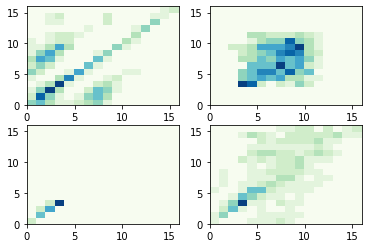

In [4]:
my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_home_2.xlsx', sheet_name='United Kingdom of Great Britain')
CH0 = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_work_2.xlsx', sheet_name='United Kingdom of Great Britain',index_col=None)
CW0 = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_school_2.xlsx', sheet_name='United Kingdom of Great Britain',index_col=None)
CS0 = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_other_locations_2.xlsx', sheet_name='United Kingdom of Great Britain',index_col=None)
CO0 = np.array(my_data)

CH = np.zeros((16, 16))
CH[0,:]= np.array((0.478812799633172, 0.55185413960287,0.334323605154544,0.132361228266194,0.138531587861408,0.281604887066586,0.406440258772792,0.493947983343078,0.113301080935514,0.0746826413664804,0.0419640342896305,0.0179831987029717,0.00553694264516568,0.00142187285266089,0,0.000505582193632659))
for i in range(15):
    CH[i+1, :] = CH0[i, :]

    
CW = np.zeros((16, 16))
CW[0,:]= np.array((0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000820604524144799,0.0000120585150153575,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000316436833811157))
for i in range(15):
    CW[i+1, :] = CW0[i, :]

    
CS = np.zeros((16, 16))
CS[0,:]= np.array((0.974577996106766,0.151369805263473,0.00874880925953218,0.0262790907947637,0.0111281607429249,0.0891043051294382,0.125477587043249,0.0883182775274553,0.0371824197201174,0.0294092695284747,0.0000000000000000000000000000000000000510911446027435,0.0000000000000000000000000000000113982464440009,0.00758428705895781,0.00151636767747242,0.0000000000000000000000000000000000000000000000000123262013953524,0.000000000000000000000000000000000000000000000000000000000000000597486362181075))
for i in range(15):
    CS[i+1, :] = CS0[i, :]

CO = np.zeros((16, 16))
CO[0,:]= np.array((0.257847576361162,0.100135168376607,0.0458036773638843,0.127084549151753,0.187303683093508,0.257979214509792,0.193228849121415,0.336594916946786,0.309223290169635,0.070538522966953,0.152218422246435,0.113554851510519,0.0615771477785246,0.040429874099682,0.0373564987094767,0.00669781557624776))
for i in range(15):
    CO[i+1, :] = CO0[i, :]

## matrix of total contacts
C=CH+CW+CS+CO



fig,aCF =  plt.subplots(2,2);
aCF[0][0].pcolor(CH, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[0][1].pcolor(CW, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[1][0].pcolor(CS, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[1][1].pcolor(CO, cmap=plt.cm.get_cmap('GnBu', 10));


In [5]:
M=1
Nd    = 6              # number of nodes
Ni = 10000*np.ones(Nd)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = (0.032)/24            # infection rate 
gI    = (1/17)/24            # recovery rate of asymptomatic infectives 
alpha = 0              # fraction of asymptomatic infectives 

Wo =np.array(([1, 5],
              [0,2],
              [1,3],
              [2,4],
              [3,5.]))

Tr =np.array(([1, 5],
              [0,2],
              [1,3],
              [2,4],
              [3,5.]))

rW, rT = 0.1, 0.01

I0  = np.array((1000, 0, 2000, 30, 4, 20))     # the SIR model has only one kind of infective 
R0  = np.zeros(Nd)     # and assume there are no recovered individuals initially 
S0  = Ni-(I0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return C

# duration of simulation and data file
Tf = 24*100;  Nt=4000; 

# instantiate model
parameters = {'beta':beta, 'gI':gI, 'rW':rW, 'rT':rT}
model = nodgeo.deterministic.SIR(parameters, Nd, M, Ni, Wo, Tr)

    ## Non-interacting nodes

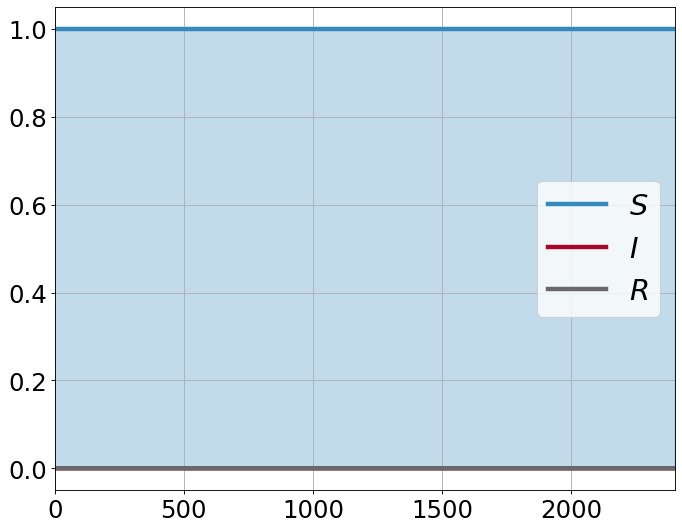

In [6]:
# simulate model 
data = model.simulate(S0, I0, contactMatrix, Tf, Nt, nodeInteraction='False')

# plot the data and obtain the epidemic curve
tNo=1
S = data['X'][:,tNo].flatten()/Ni[0]
I = data['X'][:,tNo+Nd].flatten()/Ni[0]
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

R=1-S-I; plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)


plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)

## Interacting nodes

5 0.0002633021245987599
2 0.03284342468867097
3 0.00039454741680712454
4 0.021053340232801667
5 0.0006578495414058844
0 0.02368566290151782
5 0.0002780582566016805
2 0.03298449043401141
3 0.0004090373520518355
4 0.021150006138816412
5 0.000670831355016268
0 0.023775100342148858
5 0.00027810851747595
2 0.03298444113699284
3 0.000409089468455578
4 0.021149975175235317
5 0.0006708712831648906
0 0.023775069808895686
5 0.0002643089793733509
2 0.033017393202066425
3 0.00039605973967033175
4 0.021171662080746608
5 0.0006603687190436826
0 0.02379735809955072
5 0.00026776234386987816
2 0.033115142801427695
3 0.0003996576960297036
4 0.021238311432122778
5 0.0006640492191383393
0 0.023859848654969026
5 0.0002677701865175759
2 0.03311513519879835
3 0.0003996657298342761
4 0.021238306504543718
5 0.0006640554325425435
0 0.02385984365311273
5 0.0002639948844646798
2 0.03296309237317335
3 0.0003955879593761733
4 0.021134725976016667
5 0.0006595828438408531
0 0.023762503286713012
5 0.000269795082413773

5 0.0002875479209010695
2 0.03299896642138846
3 0.00041812129514964185
4 0.021160351117167932
5 0.0006784235778015671
0 0.02378361310159439
5 0.00028754792009132505
2 0.03299896642225633
3 0.0004181212943816386
4 0.021160351117715505
5 0.000678423577174689
0 0.023783613102218264
5 0.00028754792476033
2 0.0329989664172522
3 0.00041812129880996216
4 0.021160351114558235
5 0.0006784235807892825
0 0.023783613098621023
5 0.0002875479247599588
2 0.0329989664172526
3 0.00041812129880961
4 0.02116035111455848
5 0.0006784235807889951
0 0.02378361309862131
5 0.0002875479294285925
2 0.03299896641224887
3 0.0004181213032375814
4 0.02116035111140147
5 0.000678423584403301
0 0.02378361309502435
5 0.00028754792942822127
2 0.03299896641224927
3 0.00041812130323722936
4 0.02116035111140172
5 0.0006784235844030138
0 0.02378361309502464
5 0.0002875479387640037
2 0.03299896640224341
3 0.00041812131209176376
4 0.021160351105088685
5 0.0006784235916304761
0 0.02378361308783188
5 0.0002875479480983013
2 0.03

2 0.01578931897984171
3 0.011101799286325105
4 0.01172811894719824
5 0.009808578041123204
0 0.013197645126617254
5 0.011572597528741752
2 0.01578931901731854
3 0.011101799250917864
4 0.011728118966647634
5 0.00980857801305173
0 0.013197645147862614
5 0.011572650240790659
2 0.01578914918721454
3 0.01110184776261137
4 0.011728052574962134
5 0.00980863497968933
0 0.013197567069687402
5 0.011572650234414082
2 0.015789149193572154
3 0.011101847756605313
4 0.011728052578250969
5 0.009808634974925628
0 0.013197567073277468
5 0.011572656802124024
2 0.01578912802996255
3 0.011101853800935145
4 0.011728044304958302
5 0.009808642073259675
0 0.013197557343618596
5 0.011572656802298307
2 0.015789128029897372
3 0.011101853801100356
4 0.011728044304904695
5 0.00980864207337359
0 0.013197557343565265
5 0.011572661921731443
2 0.01578911153376209
3 0.011101858512572234
4 0.011728037856191274
5 0.009808647606332514
0 0.013197549759681054
5 0.011572661921362774
2 0.015789111534673696
3 0.01110185851223026

4 0.009919367086480491
5 0.010095962914758783
0 0.010931735470314619
5 0.011188059792253662
2 0.011268730247550622
3 0.010722402253337489
4 0.009919342553787711
5 0.010095950654148984
0 0.010931701777351161
5 0.011188059792253782
2 0.011268730247550502
3 0.010722402253337595
4 0.00991934255378772
5 0.010095950654149106
0 0.010931701777351173
5 0.011187639100721219
2 0.011267872350251857
3 0.01072201175698495
4 0.009918976358534335
5 0.010095767582311494
0 0.010931198846694204
5 0.011187639102224636
2 0.011267872348808976
3 0.010722011758306107
4 0.00991897635864415
5 0.010095767583833997
0 0.010931198846835483
5 0.011187204229838847
2 0.011266985900360913
3 0.010721608104914572
4 0.009918597918932232
5 0.010095578269330677
0 0.010930679096534847
5 0.011187204233050672
2 0.011266985897278987
3 0.010721608107733292
4 0.009918597919207217
5 0.01009557827261208
0 0.010930679096876377
5 0.01118714626008961
2 0.011266867742025623
3 0.010721554296867195
4 0.009918547474074245
5 0.010095553031

0 0.009044974786481415
5 0.009310209571910434
2 0.00871747494119044
3 0.008995841543419812
4 0.008485763454100655
5 0.008909108213610396
0 0.009044915905644178
5 0.009310209571910588
2 0.008717474941190184
3 0.008995841543419945
4 0.00848576345410091
5 0.008909108213610798
0 0.009044915905644354
5 0.009310138645214674
2 0.008717397185034503
3 0.008995776956701054
4 0.008485712253936458
5 0.008909057895962592
0 0.009044849262522706
5 0.009310138645214796
2 0.008717397185034306
3 0.008995776956701156
4 0.008485712253936654
5 0.008909057895962903
0 0.009044849262522841
5 0.00930928229033618
2 0.0087164584278614
3 0.008994997150161279
4 0.008485094057202021
5 0.008908450333682764
0 0.009044044624182526
5 0.00930928229017585
2 0.008716458428107038
3 0.008994997150025457
4 0.008485094056958145
5 0.008908450333291436
0 0.009044044624010036
5 0.009309127848012
2 0.008716289134482906
3 0.008994856513339526
4 0.008484982563447445
5 0.008908340754011472
0 0.009043899508425298
5 0.0093091278476335

5 0.005301717061703856
2 0.004816212532113486
3 0.00527039022604334
4 0.005177390392216834
5 0.005466054163841696
0 0.005180640076946427
5 0.005307201170697552
2 0.004821651014314328
3 0.005275802871432327
4 0.005182904028128251
5 0.005471620296615496
0 0.005186272373831295
5 0.005301717061692885
2 0.0048162125320984975
3 0.005270390226032804
4 0.005177390392204
5 0.005466054163831359
0 0.005180640076933098
5 0.005307810530772843
2 0.004822255304953775
3 0.005276404290655769
4 0.005183516669309342
5 0.00547223877071164
0 0.005186898200183169
5 0.00530773296624085
2 0.004822163787719293
3 0.0052763196712649445
4 0.005183415635074474
5 0.005472146249336344
0 0.005186808108852793
5 0.0053092295607535134
2 0.004823645108867964
3 0.0052777951455161036
4 0.0051849157215045965
5 0.005473662455919095
0 0.005188343112625853
5 0.0053069063630753685
2 0.004821346036766945
3 0.005275504950741421
4 0.005182587736982242
5 0.005471309184809454
0 0.005185960585467018
5 0.005307540070612391
2 0.0048219

5 0.005307078766326383
2 0.004821604588996827
3 0.005275722607727474
4 0.005182897609056949
5 0.005471565272252433
0 0.005186199883959042
5 0.0053070787463660694
2 0.004821604571015651
3 0.005275722589011769
4 0.00518289759181772
5 0.005471565253674495
0 0.0051861998647479346
5 0.005307078746517475
2 0.004821604571152044
3 0.005275722589153733
4 0.0051828975919484856
5 0.005471565253815413
0 0.005186199864893657
5 0.005307078707202468
2 0.004821604535735265
3 0.005275722552290181
4 0.005182897557993088
5 0.005471565217223215
0 0.005186199827054333
5 0.005307078707202669
2 0.004821604535735445
3 0.005275722552290367
4 0.0051828975579932615
5 0.005471565217223402
0 0.005186199827054525
5 0.004008799777404179
2 0.003639381124440861
3 0.004039712581013839
4 0.004006181245516988
5 0.004218263836107053
0 0.0039175565788765725
5 0.004023853704928206
2 0.003654286631135853
3 0.00405476805710155
4 0.00402163220829312
5 0.004233855215815365
0 0.003933011023182221
5 0.004008799775821096
2 0.00363

5 0.004030315857159831
2 0.0036607273375490433
3 0.0040612465686905045
4 0.00402830891031807
5 0.004240566743374126
0 0.00393966914725508
5 0.004030315857168871
2 0.0036607273375571375
3 0.004061246568699177
4 0.004028308910326378
5 0.004240566743383039
0 0.003939669147263868
5 0.003011154981776366
2 0.002736453507994075
3 0.003069968261041881
4 0.0030603019238037575
5 0.0032130042214171817
0 0.0029396768425620752
5 0.0030273309295259588
2 0.0027525111474974284
3 0.003086345000782572
4 0.003077201699900039
5 0.00323000755046791
0 0.002956280694144111
5 0.0030111549817951884
2 0.002736453508022758
3 0.003069968261060132
4 0.003060301923827946
5 0.0032130042214350805
0 0.0029396768425863167
5 0.0030285554895951735
2 0.002753726753578061
3 0.003087584761975493
4 0.0030784810612065707
5 0.0032312947490269086
0 0.0029575376511453166
5 0.0030207573227313688
2 0.0027459558583369913
3 0.003079679739485455
4 0.0030703070181168626
5 0.0032230885241239103
0 0.002949517123212247
5 0.00302460818651

2 0.0020466658614021684
3 0.0023141438667471093
4 0.0023135002936489337
5 0.002422196853339466
0 0.0021922351918982654
5 0.002250775196613529
2 0.002049210171676702
3 0.002316756083838147
4 0.002316204721056855
5 0.002424909344065903
0 0.0021948564690302376
5 0.0022533086646815805
2 0.002051710315765798
3 0.002319340754698098
4 0.002318869586815119
5 0.002427595550306678
0 0.0021974436589941924
5 0.0022535751503706247
2 0.0020519746897006154
3 0.0023196129582215507
4 0.0023191509118765377
5 0.0024278783051334234
0 0.0021977165344700947
5 0.0022534695433927944
2 0.0020518698241328427
3 0.002319505062242779
4 0.002319039354217721
5 0.0024277662366783744
0 0.0021976083448403665
5 0.0022534962344469053
2 0.0020518962993649214
3 0.0023195323249847466
4 0.0023190675284545247
5 0.0024277945566377785
0 0.002197635673612103
5 0.002253466637562322
2 0.0020518669430854447
3 0.0023195020944769464
4 0.002319036287849277
5 0.002427763153693335
0 0.002197605370262221
5 0.0022534772028254043
2 0.00205

5 0.0016082549288550941
2 0.0014619519410094223
3 0.0016685555998446203
4 0.0016686567678143415
5 0.0017454071783691055
0 0.001563535839224395
5 0.0016120823421561642
2 0.0014657433245510959
3 0.0016724968418328455
4 0.0016727303904142989
5 0.0017494995900309879
0 0.0015674433287373988
5 0.0016082549288556336
2 0.0014619519410102111
3 0.0016685555998451557
4 0.001668656767815034
5 0.001745407178369639
0 0.0015635358392250744
5 0.0016123720720633457
2 0.001466030327365457
3 0.0016727951885673875
4 0.0016730387586236539
5 0.0017498093802856762
0 0.0015677391205849917
5 0.0016060457545340112
2 0.001459765353942713
3 0.001666280967498348
4 0.0016663065989946746
5 0.001743045124012657
0 0.00156128145696022
5 0.0016076449992325746
2 0.0014613543875300534
3 0.0016679285639551642
4 0.0016680118742105439
5 0.0017447554309118483
0 0.0015629169002429966
5 0.0016060457545304491
2 0.0014597653539380573
3 0.0016662809674947738
4 0.0016663065989903903
5 0.0017430451240090462
0 0.0015612814569559898
5

5 0.0016080633253702282
2 0.0014618000986880931
3 0.001668364143417514
4 0.0016684771635995421
5 0.001745204564178363
0 0.0015633616466881092
5 0.001608063141356606
2 0.0014617999367577106
3 0.001668363957064996
4 0.0016684769807892759
5 0.001745204368632587
0 0.001563361470308203
5 0.0016080631526747048
2 0.0014617999467175357
3 0.001668363968526952
4 0.0016684769920333564
5 0.001745204380659991
0 0.0015633614811567736
5 0.0016080629799791815
2 0.001461799794746979
3 0.0016683637936363899
4 0.0016684768204671713
5 0.0017452041971416188
0 0.0015633613156254382
5 0.0016080629913742739
2 0.001461799804774558
3 0.0016683638051763182
4 0.0016684768317877425
5 0.0017452042092508412
0 0.0015633613265478084
5 0.0016080628300738425
2 0.001461799662831581
3 0.0016683636418256837
4 0.001668476671542129
5 0.0017452040378416922
0 0.001563361171938844
5 0.0016080628415461118
2 0.0014617996729270756
3 0.0016683636534437702
4 0.0016684766829393727
5 0.0017452040500329285
0 0.0015633611829351892
5 0.0

5 0.0008707113859919225
2 0.0007961837914946927
3 0.0009130992171229311
4 0.0009154911615039989
5 0.0009527839840421778
0 0.0008463159792480241
5 0.0008707193896300529
2 0.0007961917665091567
3 0.0009131075488316753
4 0.0009154997972530155
5 0.0009527926157490132
0 0.0008463241475383118
5 0.0008707179785604988
2 0.0007961903574153074
3 0.0009131060797117646
4 0.0009154982732083428
5 0.0009527910941385248
0 0.0008463227057644653
5 0.0008707183393067461
2 0.0007961907168651671
3 0.0009131064552446494
4 0.0009154986624424805
5 0.0009527914831939688
0 0.0008463230739286371
5 0.000870717978560199
2 0.0007961903574149815
3 0.0009131060797114549
4 0.0009154982732080086
5 0.0009527910941382062
0 0.0008463227057641439
5 0.0008707187000532946
2 0.0007961910763153538
3 0.0009131068307778453
4 0.0009154990516769537
5 0.0009527918722497328
0 0.0008463234420931316
5 0.0008707184858123812
2 0.000796190862616745
3 0.0009131066077398177
4 0.0009154988204040527
5 0.0009527916412105512
0 0.00084632322332

5 0.0006377149850010007
2 0.0005838060273991403
3 0.0006711405512236458
4 0.0006729087545277795
5 0.0006994372913256241
0 0.0006193417104212013
5 0.0006397382663053892
2 0.0005858310110491722
3 0.000673254583187756
4 0.0006751029743671776
5 0.0007016240215048706
0 0.0006214085361158074
5 0.000637714984836273
2 0.0005838060271835669
3 0.0006711405510554981
4 0.0006729087543259327
5 0.0006994372911557222
0 0.0006193417102263684
5 0.0006399630775431967
2 0.000586056011557535
3 0.0006734894780286354
4 0.0006753467792333266
5 0.0007018669940718031
0 0.0006216381857675087
5 0.0006377149875546421
2 0.0005838060304373426
3 0.0006711405538517236
4 0.0006729087575035487
5 0.000699437294004208
0 0.0006193417132911359
5 0.0006386142166684267
2 0.000584706015437176
3 0.0006720801161211573
4 0.0006738839579650471
5 0.0007004091662445933
0 0.0006202602948597645
5 0.0006377149921276202
2 0.0005838060358835086
3 0.0006711405585576125
4 0.000672908762835254
5 0.0006994372988001232
0 0.000619341718433174

5 0.000467851327845956
2 0.00042876975461943716
3 0.00049368857618481
4 0.0004949811963481131
5 0.0005139472709647949
0 0.0004541276354175507
5 0.00046833622749590506
2 0.00042925416421188265
3 0.0004941965458577868
4 0.0004955078517516839
5 0.0005144723464001141
0 0.0004546218969053814
5 0.0004678513278447942
2 0.00042876975461791754
3 0.0004936885761836202
4 0.0004949811963466856
5 0.0005139472709635932
0 0.0004541276354161785
5 0.00046839010536925895
2 0.0004293079876443723
3 0.000494252987080102
4 0.0004955663691840838
5 0.0005145306882714694
0 0.00045467681499289977
5 0.0004678513279054998
2 0.00042876975469027025
3 0.0004936885762462777
4 0.000494981196417683
5 0.0005139472710273993
0 0.0004541276354843874
5 0.0004680668385272308
2 0.00042898504747654407
3 0.0004939143401833342
4 0.0004952152650795381
5 0.0005141806375066902
0 0.00045434730689515704
5 0.0004678513280122194
2 0.0004287697548174221
3 0.0004936885763564324
4 0.0004949811965424775
5 0.0005139472711395763
0 0.00045412

5 0.0003422870185144268
2 0.00031391751979680183
3 0.00036191818821213135
4 0.0003628248828409057
5 0.0003764414606129202
0 0.0003320846973791495
5 0.0003426437412166326
2 0.0003142742859540139
3 0.00036229264128202223
4 0.000363213153703207
5 0.0003768281823900531
0 0.0003324482087527271
5 0.00034228701851353845
2 0.00031391751979563973
3 0.0003619181882112192
4 0.0003628248828398116
5 0.00037644146061199937
0 0.0003320846973781012
5 0.00034268337714461267
2 0.00031431392671566133
3 0.0003623342472582177
4 0.0003632562949991528
5 0.00037687115156054095
0 0.00033248859898273546
5 0.00034228701855936665
2 0.0003139175198502864
3 0.0003619181882586286
4 0.00036282488289353
5 0.00037644146066024577
0 0.0003320846974295597
5 0.0003424455617892671
2 0.0003140760823736363
3 0.00036208461163551934
4 0.000362997447485903
5 0.00037661333678580447
0 0.0003322462578304036
5 0.0003422870186399295
2 0.0003139175199463198
3 0.0003619181883419735
4 0.00036282488298795004
5 0.00037644146074506486
0 0.

5 0.0002502335179584982
2 0.00022961784704707841
3 0.00026498396416243283
4 0.0002656169021127841
5 0.00027542686256239277
0 0.0002426843730387843
5 0.0002504955515915881
2 0.00022988014888252587
3 0.000265259435494941
4 0.0002659025600695357
5 0.00027571116049019534
0 0.00024295134467476137
5 0.0002502335179578238
2 0.00022961784704619644
3 0.0002649839641617391
4 0.0002656169021119523
5 0.0002754268625616927
0 0.00024268437303798918
5 0.0002505246664784122
2 0.00022990929357246087
3 0.0002652900434635613
4 0.0002659342998903407
5 0.0002757427491940406
0 0.00024298100823130948
5 0.00025023351799223785
2 0.00022961784708724767
3 0.00026498396419740106
4 0.0002656169021523582
5 0.00027542686259796463
0 0.00024268437307661171
5 0.00025034997727057634
2 0.00022973442555399967
3 0.0002651063957770838
4 0.00026574386110552194
5 0.00027555321710339824
0 0.00024280302701300838
5 0.00025023351805273346
2 0.0002296178471593878
3 0.00026498396426009223
4 0.00026561690222337743
5 0.00027542686266

5 0.00018281673433019299
2 0.00016782237923453864
3 0.00019381056590901926
4 0.0001942521252129443
5 0.00020134004234373753
0 0.00017725020108147436
5 0.00018300955656207492
2 0.00016801557975727044
3 0.00019401349959265366
4 0.00019446259372187912
5 0.0002015493595849841
0 0.00017744665895909117
5 0.00018281673432967306
2 0.00016782237923385852
3 0.00019381056590848364
4 0.0001942521252123021
5 0.00020134004234319722
0 0.00017725020108086157
5 0.00018303098127522545
2 0.00016803704650421886
3 0.0001940360478026823
4 0.00019448597913737675
5 0.00020157261708046313
0 0.00017746848763430277
5 0.00018281673435582716
2 0.0001678223792650653
3 0.00019381056593562049
4 0.00019425212524304723
5 0.0002013400423707863
0 0.00017725020111020268
5 0.00018290243305620678
2 0.00016790824608647206
3 0.0001939007586090228
4 0.00019434566671859438
5 0.00020143307217787175
0 0.00017733751564693974
5 0.00018281673440180072
2 0.00016782237931990378
3 0.0001938105659833229
4 0.00019425212529708413
5 0.0002

5 0.00018290039050771235
2 0.00016790981512537298
3 0.00019389843610162478
4 0.0001943448617252614
5 0.00020143030674781438
0 0.0001773375363055497
5 0.00018290038918441213
2 0.0001679098139251685
3 0.00019389843470292794
4 0.0001943448603303804
5 0.00020143030529226204
0 0.0001773375350303691
5 0.0001829003892002381
2 0.00016790981393952228
3 0.0001938984347196556
4 0.00019434486034706247
5 0.00020143030530966972
0 0.00017733753504561956
5 0.0001829003866169414
2 0.0001679098115965285
3 0.00019389843198917262
4 0.0001943448576240285
5 0.0002014303024681955
0 0.0001773375325562602
5 0.00018290038661697498
2 0.00016790981159655894
3 0.00019389843198920807
4 0.0001943448576240639
5 0.00020143030246823243
0 0.0001773375325562925
5 0.00013347472785454957
2 0.00012256097692382828
3 0.00014161949586636563
4 0.0001419273405784955
5 0.00014706058090048867
0 0.0001293804077549923
5 0.0001336175473384386
2 0.00012270425710011402
3 0.00014176992162173865
4 0.0001420834028881215
5 0.00014721566354

5 7.534458654831196e-05
2 6.7628663526568e-05
3 8.013917494422957e-05
4 7.963224082592535e-05
5 8.333866592433279e-05
0 7.209308945815986e-05
5 7.548235554979549e-05
2 6.7764177481281e-05
3 8.028464978662099e-05
4 7.978190937255377e-05
5 8.348889818633112e-05
0 7.223204812177525e-05
5 7.534458654830734e-05
2 6.762866352656084e-05
3 8.013917494422485e-05
4 7.963224082591901e-05
5 8.33386659243281e-05
0 7.209308945815391e-05
5 7.549018663476072e-05
2 6.77718803846647e-05
3 8.029291888838153e-05
4 7.979041685375404e-05
5 8.34974377101562e-05
0 7.223994682979545e-05
5 7.543105931137736e-05
2 6.771319404156028e-05
3 8.023048881480307e-05
4 7.972588608891212e-05
5 8.343297119123775e-05
0 7.217994741336814e-05
5 7.54632116673853e-05
2 6.774467785191091e-05
3 8.026444058129573e-05
4 7.9760735131124e-05
5 8.346803450576051e-05
0 7.221227952270786e-05
5 7.543105931137191e-05
2 6.771319404155334e-05
3 8.023048881479745e-05
4 7.97258860889055e-05
5 8.343297119123207e-05
0 7.217994741336182e-05
5 7

5 5.47226565223365e-05
2 4.996112227607796e-05
3 5.8268434374559344e-05
4 5.841866609732502e-05
5 6.061312695636027e-05
0 5.29313833011748e-05
5 5.472363016256425e-05
2 4.996209119815154e-05
3 5.826946361122132e-05
4 5.841973240856798e-05
5 6.061419020365844e-05
0 5.293237227207218e-05
5 5.47238312433147e-05
2 4.996229055948015e-05
3 5.8269676210592275e-05
4 5.84199523324846e-05
5 6.061440989016327e-05
0 5.2932576084858596e-05
5 5.4724220909044746e-05
2 4.996267831456848e-05
3 5.8270088127930785e-05
4 5.8420379077698864e-05
5 6.0614835420968636e-05
0 5.293297187309868e-05
5 5.472420019071563e-05
2 4.996265748561298e-05
3 5.827006623692816e-05
4 5.842035630364922e-05
5 6.061481282412122e-05
0 5.293295070558932e-05
5 5.4724222716905966e-05
2 4.996267990092619e-05
3 5.827009004948284e-05
4 5.8420380973199175e-05
5 6.061483742369289e-05
0 5.293297358546833e-05
5 5.4724218297326755e-05
2 4.996267549302753e-05
3 5.827008537801758e-05
4 5.842037612910067e-05
5 6.0614832598670306e-05
0 5.29329

5 3.9887874232772904e-05
2 3.659602786759812e-05
3 4.248841779077465e-05
4 4.26503191144908e-05
5 4.416192620140175e-05
0 3.865237710451082e-05
5 3.985463058170201e-05
2 3.6562459926672715e-05
3 4.245328566052253e-05
4 4.261372686004843e-05
5 4.412569942963703e-05
0 3.861836861266274e-05
5 3.9871660469889376e-05
2 3.657952794947082e-05
3 4.2471292087684647e-05
4 4.263242815145879e-05
5 4.4144281188852716e-05
0 3.8635717835096864e-05
5 3.9854630589493906e-05
2 3.656245993595781e-05
3 4.245328566864737e-05
4 4.261372686925405e-05
5 4.412569943790461e-05
0 3.8618368621396105e-05
5 3.9875066443932835e-05
2 3.658294154970765e-05
3 4.247489336939324e-05
4 4.263616840551484e-05
5 4.414799753692009e-05
0 3.863918767553777e-05
5 3.9891108297019276e-05
2 3.6598918671813776e-05
3 4.2491862344616074e-05
4 4.2653750261494844e-05
5 4.41655200112266e-05
0 3.865547346141484e-05
5 3.989662167970109e-05
2 3.660443379212375e-05
3 4.249769263692723e-05
4 4.265980114635691e-05
5 4.417153779041618e-05
0 3.8

3 4.2487951386781444e-05
4 4.265006200805634e-05
5 4.4161383033716953e-05
0 3.8652273597015176e-05
5 3.9887470937108794e-05
2 3.6596169643345426e-05
3 4.248795139117955e-05
4 4.2650062012447416e-05
5 4.416138303830341e-05
0 3.865227360098385e-05
5 2.9055997311286498e-05
2 2.6695505951405407e-05
3 3.095332527676663e-05
4 3.1059253757995846e-05
5 3.2144304946934765e-05
0 2.8154598046645926e-05
5 2.9194625228270983e-05
2 2.6834895202742597e-05
3 3.10998929218496e-05
4 3.1211562517257305e-05
5 3.229539414432001e-05
0 2.8295964102751696e-05
5 2.9055997311435095e-05
2 2.6695505951618463e-05
3 3.095332527691955e-05
4 3.1059253758191043e-05
5 3.214430494708784e-05
0 2.8154598046829532e-05
5 2.9205118981200488e-05
2 2.6845446586780205e-05
3 3.11109876908301e-05
4 3.1223091873262845e-05
5 3.2306831182604025e-05
0 2.8306665125488225e-05
5 2.8972835689382183e-05
2 2.6612273691966313e-05
3 3.0865368615932717e-05
4 3.096801643689759e-05
5 3.205359207793409e-05
0 2.80700155039103e-05
5 2.903284874932

5 3.220690158601782e-05
0 2.8213439182105175e-05
5 2.9113497569912448e-05
2 2.675368098457913e-05
3 3.101408829061797e-05
4 3.112254819807024e-05
5 3.220690158604063e-05
0 2.8213439182124965e-05
5 2.911349690633659e-05
2 2.6753680383210868e-05
3 3.101408758349473e-05
4 3.112254749104338e-05
5 3.22069008496502e-05
0 2.8213438543181633e-05
5 2.911349690636401e-05
2 2.675368038323572e-05
3 3.101408758352395e-05
4 3.112254749107259e-05
5 3.220690084968063e-05
0 2.8213438543208034e-05
5 2.911349677613191e-05
2 2.6753680265212358e-05
3 3.101408744474532e-05
4 3.1122547352312886e-05
5 3.220690070515808e-05
0 2.8213438417810264e-05
5 2.9113496777124266e-05
2 2.6753680266111683e-05
3 3.1014087445802794e-05
4 3.112254735337021e-05
5 3.220690070625933e-05
0 2.821343841876577e-05
5 2.9113496647884508e-05
2 2.675368014898764e-05
3 3.101408730808164e-05
4 3.112254721566782e-05
5 3.2206900562838016e-05
0 2.8213438294323516e-05
5 2.9113496648877298e-05
2 2.675368014988736e-05
3 3.101408730913958e-05
4

0 2.0593777787725472e-05
5 2.1254494676121094e-05
2 1.9542671128350898e-05
3 2.264031240479002e-05
4 2.2708359643391928e-05
5 2.349522725807132e-05
0 2.0593777789156714e-05
5 2.1254494465984508e-05
2 1.9542670937431186e-05
3 2.2640312180791546e-05
4 2.270835941956509e-05
5 2.3495227025154675e-05
0 2.0593777586849216e-05
5 2.1254494469226835e-05
2 1.9542670940377008e-05
3 2.2640312184247755e-05
4 2.2708359423018658e-05
5 2.3495227028748494e-05
0 2.0593777589970746e-05
5 2.1254494262332577e-05
2 1.9542670752403114e-05
3 2.26403119637055e-05
4 2.270835920264537e-05
5 2.349522679942566e-05
0 2.0593777390784776e-05
5 2.125449426557794e-05
2 1.9542670755351697e-05
3 2.2640311967164948e-05
4 2.270835920610218e-05
5 2.3495226803022846e-05
0 2.0593777393909233e-05
5 2.1254493864770907e-05
2 1.9542670391198243e-05
3 2.264031153991825e-05
4 2.270835877918283e-05
5 2.349522635876594e-05
0 2.0593777008035124e-05
5 2.1254493864780038e-05
2 1.9542670391206537e-05
3 2.2640311539927983e-05
4 2.27083587

2 1.0420442560755395e-05
3 1.2064979707652742e-05
4 1.209319797072055e-05
5 1.2511907285080331e-05
0 1.0976172126244152e-05
5 1.1330578660458727e-05
2 1.0420445971366936e-05
3 1.206498330437669e-05
4 1.2093201699425141e-05
5 1.2511910989141202e-05
0 1.0976175586825637e-05
5 1.1330575258176792e-05
2 1.0420442560753139e-05
3 1.2064979707650577e-05
4 1.2093197970718213e-05
5 1.2511907285078117e-05
0 1.0976172126241952e-05
5 1.133058206274066e-05
2 1.0420449381980733e-05
3 1.2064986901102798e-05
4 1.209320542813207e-05
5 1.2511914693204284e-05
0 1.0976179047409328e-05
5 1.1330576625490949e-05
2 1.0420443930822631e-05
3 1.2064981153164e-05
4 1.209319946900882e-05
5 1.2511908773784287e-05
0 1.097617351663463e-05
5 1.133057798640693e-05
2 1.0420445295070945e-05
3 1.2064982591857873e-05
4 1.2093200960494953e-05
5 1.2511910255413092e-05
0 1.0976174900871121e-05
5 1.1330579334531175e-05
2 1.0420446647681951e-05
3 1.2064984016917494e-05
4 1.2093202438377386e-05
5 1.2511911722892112e-05
0 1.097617

5 8.271385916073452e-06
2 7.60680157076804e-06
3 8.805692713205983e-06
4 8.824714568239463e-06
5 9.130693175896047e-06
0 8.012471495594279e-06
5 8.271387172068597e-06
2 7.606802829806369e-06
3 8.80569404071574e-06
4 8.824715944248973e-06
5 9.13069454284226e-06
0 8.012472773079786e-06
5 8.271386422716966e-06
2 7.606802078419682e-06
3 8.805693248717668e-06
4 8.824715123216654e-06
5 9.130693727335492e-06
0 8.012472010775963e-06
5 8.271387174440514e-06
2 7.6068028319645015e-06
3 8.805694043243317e-06
4 8.824715946769764e-06
5 9.130694545464197e-06
0 8.012472775361615e-06
5 8.271386573768328e-06
2 7.60680222977161e-06
3 8.805693408375823e-06
4 8.824715288678281e-06
5 9.130693891742368e-06
0 8.012472164372906e-06
5 8.271386724113091e-06
2 7.6068023804806195e-06
3 8.80569356728101e-06
4 8.824715453388957e-06
5 9.13069405536817e-06
0 8.012472317290089e-06
5 8.271386873044736e-06
2 7.60680252990388e-06
3 8.805693724680341e-06
4 8.824715616597823e-06
5 9.1306942174319e-06
0 8.012472468847825e-06

3 4.203732578960631e-06
4 4.19652158472995e-06
5 4.3619087775278045e-06
0 3.802548312573126e-06
5 3.9469799418896985e-06
2 3.593810975118907e-06
3 4.203733125754226e-06
4 4.196522148919913e-06
5 4.361909340971937e-06
0 3.8025488357447205e-06
5 3.946979939414238e-06
2 3.5938109729841953e-06
3 4.203733123120335e-06
4 4.196522146372351e-06
5 4.3619093382462015e-06
0 3.802548833450258e-06
5 3.946979939412606e-06
2 3.593810972982788e-06
3 4.203733123118598e-06
4 4.19652214637067e-06
5 4.361909338244403e-06
0 3.8025488334487454e-06
5 3.9469799344584175e-06
2 3.5938109687105507e-06
3 4.20373311784734e-06
4 4.196522141272186e-06
5 4.361909332789335e-06
0 3.8025488288567947e-06
5 3.946979934451886e-06
2 3.593810968704918e-06
3 4.20373311784039e-06
4 4.196522141265464e-06
5 4.3619093327821435e-06
0 3.802548828850741e-06
5 3.9469799294911665e-06
2 3.5938109644270484e-06
3 4.203733112562184e-06
4 4.196522136160256e-06
5 4.361909327319884e-06
0 3.8025488242527365e-06
5 3.946979929484635e-06
2 3.593

5 1.9390852168559585e-06
2 1.769379409267589e-06
3 2.0664082767733743e-06
4 2.0665511218908164e-06
5 2.14533566128938e-06
0 1.8712214238869503e-06
5 1.943837210250348e-06
2 1.7741339566184256e-06
3 2.0714341642457455e-06
4 2.071760268140713e-06
5 2.150515893832601e-06
0 1.8760545742348815e-06
5 1.9390852168573425e-06
2 1.7693794092695974e-06
3 2.066408276774797e-06
4 2.0665511218926485e-06
5 2.145335661290802e-06
0 1.8712214238886702e-06
5 1.9441969229038604e-06
2 1.7744938625989248e-06
3 2.0718146099179886e-06
4 2.0721545859917173e-06
5 2.1509080229967275e-06
0 1.8764204302434493e-06
5 1.944837787390668e-06
2 1.7750983793951304e-06
3 2.0724945314029825e-06
4 2.0728409859261786e-06
5 2.151610827214079e-06
0 1.8770491183738031e-06
5 1.946002843872904e-06
2 1.7762610352780786e-06
3 2.0737269040217733e-06
4 2.0741167746149402e-06
5 2.1528811991341415e-06
0 1.8782321414510483e-06
5 1.9448377884471367e-06
2 1.775098380647404e-06
3 2.0724945325051625e-06
4 2.0728409871696383e-06
5 2.15161082

3 1.1019480791535343e-06
4 1.1050512227110538e-06
5 1.143405142266751e-06
0 1.0019013706544456e-06
5 1.0323837087207853e-06
2 9.486994254098772e-07
3 1.0999818291483622e-06
4 1.103008793779139e-06
5 1.141379804256395e-06
0 1.0000054560511187e-06
5 1.0344498177041414e-06
2 9.50777834965075e-07
3 1.1021665513944788e-06
4 1.1052781592806024e-06
5 1.1436301798418458e-06
0 1.0021120278528199e-06
5 1.0344682093083136e-06
2 9.507866010712415e-07
3 1.1021868834053169e-06
4 1.1052950077560254e-06
5 1.1436520607527085e-06
0 1.002125073889696e-06
5 1.0349825172703018e-06
2 9.513023120683862e-07
3 1.1027308678457818e-06
4 1.1058593421254341e-06
5 1.144212552197173e-06
0 1.0026484788060072e-06
5 1.034517281461e-06
2 9.508357407151609e-07
3 1.1022387931963143e-06
4 1.1053488303851047e-06
5 1.1437055521918417e-06
0 1.0021749752555874e-06
5 1.0350081823877233e-06
2 9.513279543818198e-07
3 1.1027580226282408e-06
4 1.1058874734733187e-06
5 1.144240540332388e-06
0 1.0026745429265271e-06
5 1.0346603594857

4 8.067207533339898e-07
5 8.346129418417005e-07
0 7.317717975437794e-07
5 7.553722563783083e-07
2 6.94609399691585e-07
3 8.046330987819246e-07
4 8.067201053065297e-07
5 8.346122677048543e-07
0 7.31771211759552e-07
5 7.553722564826234e-07
2 6.946093997863997e-07
3 8.046330988931647e-07
4 8.06720105417566e-07
5 8.346122678203654e-07
0 7.317712118599228e-07
5 7.553714131510478e-07
2 6.94608633246423e-07
3 8.046321995759407e-07
4 8.067192077403256e-07
5 8.346113339752413e-07
0 7.317704004048459e-07
5 7.553714131670807e-07
2 6.946086332609923e-07
3 8.046321995930381e-07
4 8.067192077573891e-07
5 8.346113339929948e-07
0 7.317704004202698e-07
5 7.553703393762336e-07
2 6.946076572466925e-07
3 8.046310545172061e-07
4 8.067180647696505e-07
5 8.346101449537374e-07
0 7.317693672168302e-07
5 7.553703394869699e-07
2 6.946076573473409e-07
3 8.046310546352936e-07
4 8.067180648875195e-07
5 8.346101450763587e-07
0 7.317693673233776e-07
5 7.553690398758572e-07
2 6.94606476075252e-07
3 8.046296687478253e-

0 5.34043591753075e-07
5 5.512927984814501e-07
2 5.070060189258274e-07
3 5.871013785544141e-07
4 5.884821396967125e-07
5 6.088365475400033e-07
0 5.340436077894685e-07
5 5.51270718790998e-07
2 5.069859342075246e-07
3 5.870778387138871e-07
4 5.884586527290842e-07
5 6.08812119127393e-07
0 5.34022364298567e-07
5 5.512707581465447e-07
2 5.069859700076845e-07
3 5.870778806720608e-07
4 5.884586945933739e-07
5 6.088121626694059e-07
0 5.340224021640476e-07
5 5.512685642465268e-07
2 5.069839743317444e-07
3 5.870755416873977e-07
4 5.884563608609451e-07
5 6.088097353936486e-07
0 5.340202913496313e-07
5 5.512685647374124e-07
2 5.069839747778253e-07
3 5.870755422107378e-07
4 5.884563613827943e-07
5 6.088097359367257e-07
0 5.34020291821572e-07
5 5.512673624306613e-07
2 5.069828811017714e-07
3 5.870742603943145e-07
4 5.884550824443132e-07
5 6.088084057347661e-07
0 5.340191350471569e-07
5 5.512673638756258e-07
2 5.0698288241627e-07
3 5.870742619348374e-07
4 5.884550839814399e-07
5 6.088084073334436e-07

5 2.524232749733229e-07
2 2.2900501761939616e-07
3 2.6899012839e-07
4 2.681844318827477e-07
5 2.7918897479855046e-07
0 2.4268067185717924e-07
5 2.531048202241357e-07
2 2.296831012098767e-07
3 2.6971100460615635e-07
4 2.6892931705262856e-07
5 2.7993191261632896e-07
0 2.433715282750515e-07
5 2.5242327497345584e-07
2 2.290050176195925e-07
3 2.6899012839013635e-07
4 2.681844318829256e-07
5 2.7918897479868646e-07
0 2.4268067185734584e-07
5 2.531564112989371e-07
2 2.297344302465918e-07
3 2.697655729253624e-07
4 2.689857027826529e-07
5 2.799881509372614e-07
0 2.4342382417920797e-07
5 2.532432641803291e-07
2 2.2981546310578267e-07
3 2.6985765884447754e-07
4 2.690779232016856e-07
5 2.8008318676816054e-07
0 2.435082757368338e-07
5 2.534084348095178e-07
2 2.2997957871143865e-07
3 2.7003236772463944e-07
4 2.692583295815796e-07
5 2.8026324447858374e-07
0 2.4367555336096726e-07
5 2.532432643609246e-07
2 2.2981546331857185e-07
3 2.6985765903288287e-07
4 2.690779234133656e-07
5 2.8008318695959713e-07


5 1.84400446004592e-07
2 1.6895647082412323e-07
3 1.9652990450060984e-07
4 1.9696962806862174e-07
5 2.0404002800756775e-07
0 1.7843271997542533e-07
5 1.84710350901638e-07
2 1.6926603030175623e-07
3 1.9685780815022737e-07
4 1.9730939739892684e-07
5 2.0437810217805822e-07
0 1.7874763451684635e-07
5 1.8440044600137266e-07
2 1.6895647081992806e-07
3 1.965299044972737e-07
4 1.969696280646322e-07
5 2.0404002800420199e-07
0 1.7843271997164211e-07
5 1.847447847812889e-07
2 1.6930042580212712e-07
3 1.9689424189135965e-07
4 1.9734714954946745e-07
5 2.0441566597708837e-07
0 1.7878262502402975e-07
5 1.844004461061271e-07
2 1.6895647094490438e-07
3 1.965299046065552e-07
4 1.969696281884424e-07
5 2.0404002811525687e-07
0 1.7843272008903958e-07
5 1.8453818150304967e-07
2 1.6909405280070027e-07
3 1.9667563944415376e-07
4 1.9712063664647424e-07
5 2.0419028318241138e-07
0 1.785726819811484e-07
5 1.8440044628722889e-07
2 1.68956471160428e-07
3 1.9652990479551772e-07
4 1.9696962840220912e-07
5 2.040400283

5 1.3441164550143248e-07
2 1.2347722518505908e-07
3 1.432339744246522e-07
4 1.436524688995088e-07
5 1.4865667865187267e-07
0 1.302017667395988e-07
5 1.345219474205393e-07
2 1.2358783771958945e-07
3 1.4335065417553886e-07
4 1.437735448164233e-07
5 1.4877692101852084e-07
0 1.3031405134164014e-07
5 1.3448882686235878e-07
2 1.2355447937057902e-07
3 1.4331563145215735e-07
4 1.4373713954116553e-07
5 1.4874084289960138e-07
0 1.3028025147880804e-07
5 1.3449466615388285e-07
2 1.2356032759685268e-07
3 1.4332180904964705e-07
4 1.4374354660844128e-07
5 1.487472098414403e-07
0 1.3028619137242142e-07
5 1.3448882634868962e-07
2 1.2355447880962393e-07
3 1.433156309125247e-07
4 1.4373713895845752e-07
5 1.48740842347317e-07
0 1.3028025093053272e-07
5 1.345005059590766e-07
2 1.2356617638408223e-07
3 1.4332798718676995e-07
4 1.4374995425842583e-07
5 1.4875357733556424e-07
0 1.3029213181431083e-07
5 1.3449680063144658e-07
2 1.235624604484039e-07
3 1.433240676293532e-07
4 1.4374588695548287e-07
5 1.48749538

5 9.792402515451584e-08
2 9.001527520058391e-08
3 1.0432954349491017e-07
4 1.046090749762122e-07
5 1.0823693844471022e-07
0 9.485638749444377e-08
5 9.803363470155749e-08
2 9.012556637179721e-08
3 1.0444543837692484e-07
4 1.0472945508402336e-07
5 1.0835629555387151e-07
0 9.49681442537961e-08
5 9.814519932435401e-08
2 9.023680895880319e-08
3 1.0456349504825576e-07
4 1.0485163372786163e-07
5 1.084779766513392e-07
0 9.50812970780601e-08
5 9.817264135230105e-08
2 9.026432049874354e-08
3 1.0459252011421572e-07
4 1.0488173772505509e-07
5 1.0850787853522543e-07
0 9.510921706305946e-08
5 9.815073585243742e-08
2 9.024235514269158e-08
3 1.0456935137200003e-07
4 1.0485770583324152e-07
5 1.0848401031490916e-07
0 9.508692747487651e-08
5 9.815623174705433e-08
2 9.024786430892299e-08
3 1.0457516436760658e-07
4 1.0486373462813633e-07
5 1.0848999897870752e-07
0 9.509251870978354e-08
5 9.815073522782027e-08
2 9.024235445999659e-08
3 1.0456935071595054e-07
4 1.0485770512476044e-07
5 1.0848400964376015e-07

5 5.214185945591557e-08
2 4.794058394930079e-08
3 5.552520772193979e-08
4 5.5644995737335095e-08
5 5.757764866736935e-08
0 5.050157200303383e-08
5 5.2256420487818136e-08
2 4.805593195668356e-08
3 5.56462742273269e-08
4 5.57707238157294e-08
5 5.7702272016423714e-08
0 5.061839541313618e-08
5 5.214185945188008e-08
2 4.794058394402009e-08
3 5.552520771776119e-08
4 5.564499573232745e-08
5 5.757764866315923e-08
0 5.050157199828645e-08
5 5.2269149494059734e-08
2 4.8068748405476655e-08
3 5.5659726064051846e-08
4 5.5784693605564895e-08
5 5.771611905802208e-08
0 5.063137579520899e-08
5 5.2270934026233144e-08
2 4.806989765305921e-08
3 5.566167278928635e-08
4 5.5786422809335974e-08
5 5.77181796133172e-08
0 5.063280885251067e-08
5 5.2302615843536324e-08
2 4.810169967416792e-08
3 5.569516283386679e-08
4 5.5821158432199115e-08
5 5.775266201878788e-08
0 5.06650578265644e-08
5 5.227089400995325e-08
2 4.8069853898629704e-08
3 5.5661630779788994e-08
4 5.5786377452618155e-08
5 5.7718136658661626e-08
0 5.0

5 2.7869077647190807e-08
2 2.5628488463347218e-08
3 2.9663686198749815e-08
4 2.9723551716177783e-08
5 3.0755944829997265e-08
0 2.69964018558477e-08
5 2.7869087201344868e-08
2 2.5628497156356494e-08
3 2.966369637765743e-08
4 2.9723561863901103e-08
5 3.0755955385257236e-08
0 2.699641104620443e-08
5 2.786856082970233e-08
2 2.5628018219991495e-08
3 2.9663135586026278e-08
4 2.972300278431359e-08
5 3.075537385850009e-08
0 2.699590471077624e-08
5 2.7868572719388383e-08
2 2.5628029038018848e-08
3 2.966314825318805e-08
4 2.972301541266407e-08
5 3.075538699401393e-08
0 2.699591614772965e-08
5 2.7865266734172713e-08
2 2.5625020968494338e-08
3 2.9659626085973608e-08
4 2.9719503989992655e-08
5 3.075173459480391e-08
0 2.699273599489083e-08
5 2.78655568113248e-08
2 2.5625284905703363e-08
3 2.9659935131590236e-08
4 2.9719812092910697e-08
5 3.0752055067375804e-08
0 2.699301503119571e-08
5 2.7863158706103586e-08
2 2.5623102885774596e-08
3 2.9657380211341488e-08
4 2.971726495361346e-08
5 3.07494056778470

2 1.3657799281409643e-08
3 1.5804478894207482e-08
4 1.5835078282257286e-08
5 1.638684909231882e-08
0 1.4388804633304698e-08
5 1.484863706183456e-08
2 1.3653164860096262e-08
3 1.5799659027868658e-08
4 1.5830057392918347e-08
5 1.638189101095584e-08
0 1.4384125058405324e-08
5 1.4851225417846844e-08
2 1.3655759079157331e-08
3 1.580239337408246e-08
4 1.5832891068012837e-08
5 1.6384706421033697e-08
0 1.4386757797655918e-08
5 1.4847700554052152e-08
2 1.3652226691974644e-08
3 1.5798669656975104e-08
4 1.5829032293866645e-08
5 1.638087227026189e-08
0 1.4383172765283335e-08
5 1.4848579247381474e-08
2 1.3653107477091136e-08
3 1.5799597901547852e-08
4 1.582999430372305e-08
5 1.6381828025649933e-08
0 1.4384066587169103e-08
5 1.4849446914141119e-08
2 1.365397824988686e-08
3 1.5800514403017285e-08
4 1.5830944618409193e-08
5 1.6382771603253743e-08
0 1.438494981307762e-08
5 1.4848565690694223e-08
2 1.3653095143641164e-08
3 1.579958346595944e-08
4 1.5829979915832583e-08
5 1.6381813057682604e-08
0 1.43840

3 8.411783527951985e-09
4 8.42772775618265e-09
5 8.722341789287806e-09
0 7.65998280765563e-09
5 7.907506256127312e-09
2 7.270089916620542e-09
3 8.412186720118701e-09
4 8.428145667001245e-09
5 8.722756946303564e-09
0 7.660371237674237e-09
5 7.907122265868761e-09
2 7.269705120070217e-09
3 8.411781154430239e-09
4 8.427725390808832e-09
5 8.722339328084017e-09
0 7.65998066264753e-09
5 7.907119574501388e-09
2 7.269702672212421e-09
3 8.411778289655223e-09
4 8.427722535909335e-09
5 8.722336357482132e-09
0 7.659978073726542e-09
5 7.907119576142e-09
2 7.269702673704598e-09
3 8.41177829140154e-09
4 8.427722537649634e-09
5 8.722336359292961e-09
0 7.659978075304705e-09
5 7.907116428023486e-09
2 7.269699810390614e-09
3 8.411774940445758e-09
4 8.427719198224684e-09
5 8.722332884548968e-09
0 7.659975046995862e-09
5 7.907116429710994e-09
2 7.269699811925443e-09
3 8.411774942241995e-09
4 8.42771920001473e-09
5 8.722332886411559e-09
0 7.659975048619138e-09
5 7.907059942217088e-09
2 7.269648434747965e-09


5 4.210701035995054e-09
2 3.870968526805716e-09
3 4.47884556913298e-09
4 4.487277197595465e-09
5 4.644446064703972e-09
0 4.079154358022377e-09
5 4.200161299081506e-09
2 3.860361186927559e-09
3 4.467719095787936e-09
4 4.475726153510107e-09
5 4.632992104398188e-09
0 4.068405895659944e-09
5 4.212808929082016e-09
2 3.873089929869282e-09
3 4.481070807256572e-09
4 4.4895873423184286e-09
5 4.646736799363947e-09
0 4.081303989616414e-09
5 4.205504884673644e-09
2 3.865712931484253e-09
3 4.473362410815669e-09
4 4.481572842590479e-09
5 4.6388036486996875e-09
0 4.0738396448352455e-09
5 4.210640397153852e-09
2 3.870875049270136e-09
3 4.478784349589132e-09
4 4.487198765395581e-09
5 4.644385672868943e-09
0 4.079073025578543e-09
5 4.2054912856566804e-09
2 3.865698068661125e-09
3 4.4733481498658014e-09
4 4.481557450408292e-09
5 4.638789066677316e-09
0 4.073825128361779e-09
5 4.215789509516244e-09
2 3.876052031890862e-09
3 4.484220550248408e-09
4 4.492840082164399e-09
5 4.649982280098565e-09
0 4.08432092

3 1.2721693365520365e-09
4 1.2745816251492894e-09
5 1.3192795724491771e-09
0 1.158851805294138e-09
5 1.195704854809706e-09
2 1.099152132227456e-09
3 1.2716815748042152e-09
4 1.274069944519972e-09
5 1.318778378364797e-09
0 1.1583726975972496e-09
5 1.1963058565106864e-09
2 1.0997549747364464e-09
3 1.2723161216792404e-09
4 1.274727799636527e-09
5 1.3194317989281814e-09
0 1.1589844265296464e-09
5 1.1962544568289815e-09
2 1.099702601215908e-09
3 1.2722619234512841e-09
4 1.2746712376673884e-09
5 1.3193760568678956e-09
0 1.1589316229287486e-09
5 1.1963151885188286e-09
2 1.09976345959463e-09
3 1.2723260500119158e-09
4 1.2747376926177207e-09
5 1.319442095729485e-09
0 1.1589934032520418e-09
5 1.1963148532893096e-09
2 1.0997631547115692e-09
3 1.2723256933590693e-09
4 1.2747373371779274e-09
5 1.3194417258361918e-09
0 1.1589930807223404e-09
5 1.1963147808000176e-09
2 1.0997630887859518e-09
3 1.2723256162372795e-09
4 1.2747372603195265e-09
5 1.3194416458513944e-09
0 1.1589930109804263e-09
5 1.196314

5 8.712788883399541e-11
2 8.009089991055902e-11
3 9.269241937472838e-11
4 9.286854439037339e-11
5 9.612267269311427e-11
0 8.439834657683327e-11
5 8.725953251367721e-11
2 8.022311582153289e-11
3 9.283143754846835e-11
4 9.301274878882388e-11
5 9.626580779009905e-11
0 8.453242695725259e-11
5 8.725571530734302e-11
2 8.021964187330987e-11
3 9.282737439294315e-11
4 9.300869743850983e-11
5 9.626159347315515e-11
0 8.452875316074757e-11
5 8.725283269931365e-11
2 8.021702044039898e-11
3 9.282430609576602e-11
4 9.300563936180881e-11
5 9.625841111916626e-11
0 8.452598029538189e-11
5 8.72394432740953e-11
2 8.020484415057601e-11
3 9.281005416311758e-11
4 9.299143490442063e-11
5 9.624362940420177e-11
0 8.451310061625968e-11
5 8.724796953351893e-11
2 8.021259784882753e-11
3 9.281912965769661e-11
4 9.30004801316578e-11
5 9.6253042255708e-11
0 8.452130223521429e-11
5 6.301315228004606e-11
2 5.792866451445407e-11
3 6.703203533868475e-11
4 6.715945638852725e-11
5 6.951126862573423e-11
0 6.104241980046228e

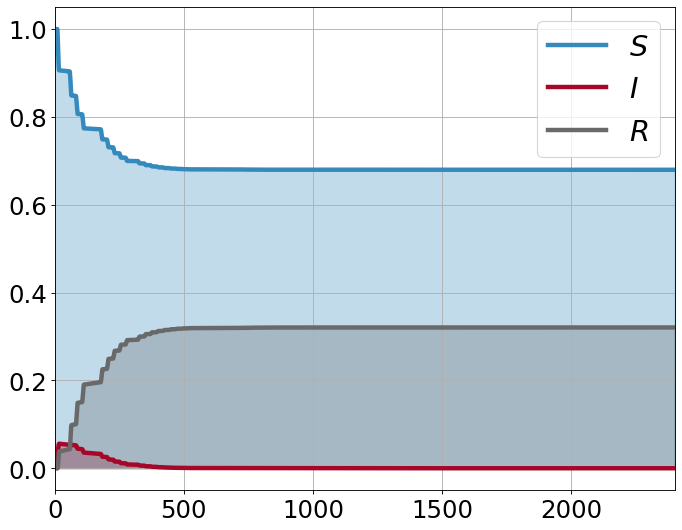

In [5]:
# simulate model 
data = model.simulate(S0, I0, contactMatrix, Tf, Nt, nodeInteraction='True')

# plot the data and obtain the epidemic curve
tNo=1
S = data['X'][:,tNo].flatten()/Ni[0]
I = data['X'][:,tNo+Nd].flatten()/Ni[0]
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

R=1-S-I; plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)


plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)